In [1]:
import pandas as pd
import json
import random
import numpy as np
RANDOM_SEED = 42

In [2]:
a = pd.read_excel("final/characters_cleaned.xlsx")
a

,source_type,source_id,name,series,series_source_id,genre,rarity,image_url,about,favorites
0,mal,161471,Itsuki Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",7844
1,mal,161472,Nino Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",15036
2,mal,161470,Ichika Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",3832
3,mal,161469,Yotsuba Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",5879
4,mal,160603,Miku Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",21838
...,...,...,...,...,...,...,...,...,...,...
2452,ss,ss_cosette,Cosette,Stella Sora,ss,Game,1,https://static.wikitide.net/stellasorawiki/e/e...,A mysterious girl with a deep obsession for ve...,0
2453,ss,ss_caramel,Caramel,Stella Sora,ss,Game,1,https://static.wikitide.net/stellasorawiki/0/0...,NaN,0
2454,ss,ss_noya,Noya,Stella Sora,ss,Game,3,https://static.wikitide.net/stellasorawiki/d/d...,"A member of the New Star Guild.\nCheerful, hel...",0
2455,ss,ss_canace,Canace,Stella Sora,ss,Game,1,https://static.wikitide.net/stellasorawiki/8/8...,Canace is a beloved lecturer at Grace Light Ac...,0


In [3]:
with open("batch_data.json", "r") as f:
    b = json.load(f)

In [4]:
'''    {
        "name": "Itsuki Nakano",
        "series": "5-toubun no Hanayome",
        "archetype": "Ally",
        "stats": {
            "hp": 95,
            "atk": 90,
            "mag": 100,
            "vit": 90,
            "spr": 110,
            "int": 105,
            "spd": 90,
            "lck": 95
        },
        "role_potency": {
            "Mage": "C",
            "Attacker": "C",
            "Healer": "B",
            "Buffer": "B",
            "Debuffer": "C",
            "Defender": "C",
            "Specialist": "C"
        },
        "elemental_type": [
            "neutral"
        ],
        "elemental_resistances": {
            "fire": "neutral",
            "water": "neutral",
            "earth": "neutral",
            "wind": "neutral",
            "nature": "neutral",
            "neutral": "neutral",
            "void": "neutral",
            "light": "neutral",
            "dark": "neutral"
        },
        "source_id": 161471,
        "source_name": "mal"
    }'''

c = a.copy()
c["archetype"] = None
c["stats"] = None
c["potency"] = None
c["elemental_type"] = None
c["elemental_resistances"] = None

In [5]:
print(len(b))

2457


In [6]:
for i,char in enumerate(b):
    id = char["source_id"]
    np.random.seed(RANDOM_SEED + i)
    var = np.random.normal(0, 3, len(char["stats"]))
    for j,sts in enumerate(char["stats"]):
        char["stats"][sts] = max(1, min(200, int(char["stats"][sts] + var[j])))
    c.loc[c["source_id"]==id, "archetype"] = char["archetype"]
    c.loc[c["source_id"]==id, "stats"] = json.dumps(char["stats"])
    c.loc[c["source_id"]==id, "potency"] = json.dumps(char["role_potency"])
    c.loc[c["source_id"]==id, "elemental_type"] = json.dumps(char["elemental_type"])
    c.loc[c["source_id"]==id, "elemental_resistances"] = json.dumps(char["elemental_resistances"])

In [7]:
c

,source_type,source_id,name,series,series_source_id,genre,rarity,image_url,about,favorites,archetype,stats,potency,elemental_type,elemental_resistances
0,mal,161471,Itsuki Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",7844,Ally,"{""hp"": 96, ""atk"": 89, ""mag"": 101, ""vit"": 94, ""...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""neutral""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
1,mal,161472,Nino Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",15036,Trickster,"{""hp"": 70, ""atk"": 87, ""mag"": 98, ""vit"": 73, ""s...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""C"", ...","[""fire""]","{""fire"": ""resist"", ""water"": ""weak"", ""earth"": ""..."
2,mal,161470,Ichika Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",3832,Illusionist,"{""hp"": 67, ""atk"": 83, ""mag"": 103, ""vit"": 65, ""...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""C"", ...","[""wind""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
3,mal,161469,Yotsuba Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",5879,Physical Attacker,"{""hp"": 100, ""atk"": 130, ""mag"": 58, ""vit"": 99, ...","{""Mage"": ""F"", ""Attacker"": ""C"", ""Healer"": ""D"", ...","[""nature""]","{""fire"": ""weak"", ""water"": ""neutral"", ""earth"": ..."
4,mal,160603,Miku Nakano,5-toubun no Hanayome,38101,Anime,3,https://cdn.myanimelist.net/images/characters/...,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",21838,Sage,"{""hp"": 71, ""atk"": 73, ""mag"": 102, ""vit"": 67, ""...","{""Mage"": ""B"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""water""]","{""fire"": ""resist"", ""water"": ""resist"", ""earth"":..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,ss,ss_cosette,Cosette,Stella Sora,ss,Game,1,https://static.wikitide.net/stellasorawiki/e/e...,A mysterious girl with a deep obsession for ve...,0,Ally,"{""hp"": 92, ""atk"": 90, ""mag"": 90, ""vit"": 92, ""s...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""neutral""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
2453,ss,ss_caramel,Caramel,Stella Sora,ss,Game,1,https://static.wikitide.net/stellasorawiki/0/0...,NaN,0,Ally,"{""hp"": 85, ""atk"": 88, ""mag"": 83, ""vit"": 92, ""s...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""neutral""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
2454,ss,ss_noya,Noya,Stella Sora,ss,Game,3,https://static.wikitide.net/stellasorawiki/d/d...,"A member of the New Star Guild.\nCheerful, hel...",0,Samurai,"{""hp"": 100, ""atk"": 129, ""mag"": 59, ""vit"": 102,...","{""Mage"": ""C"", ""Attacker"": ""B"", ""Healer"": ""C"", ...","[""wind""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
2455,ss,ss_canace,Canace,Stella Sora,ss,Game,1,https://static.wikitide.net/stellasorawiki/8/8...,Canace is a beloved lecturer at Grace Light Ac...,0,Healer,"{""hp"": 73, ""atk"": 56, ""mag"": 76, ""vit"": 67, ""s...","{""Mage"": ""D"", ""Attacker"": ""D"", ""Healer"": ""S"", ...","[""wind""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."


In [8]:
c.to_csv("final/characters_with_stats.csv", index=False)

In [9]:
d = c.drop(columns = ["about"])
d.sort_values(by=["series"], inplace=True)
d.to_csv("final/characters_with_stats_for_llm.csv", index=False)

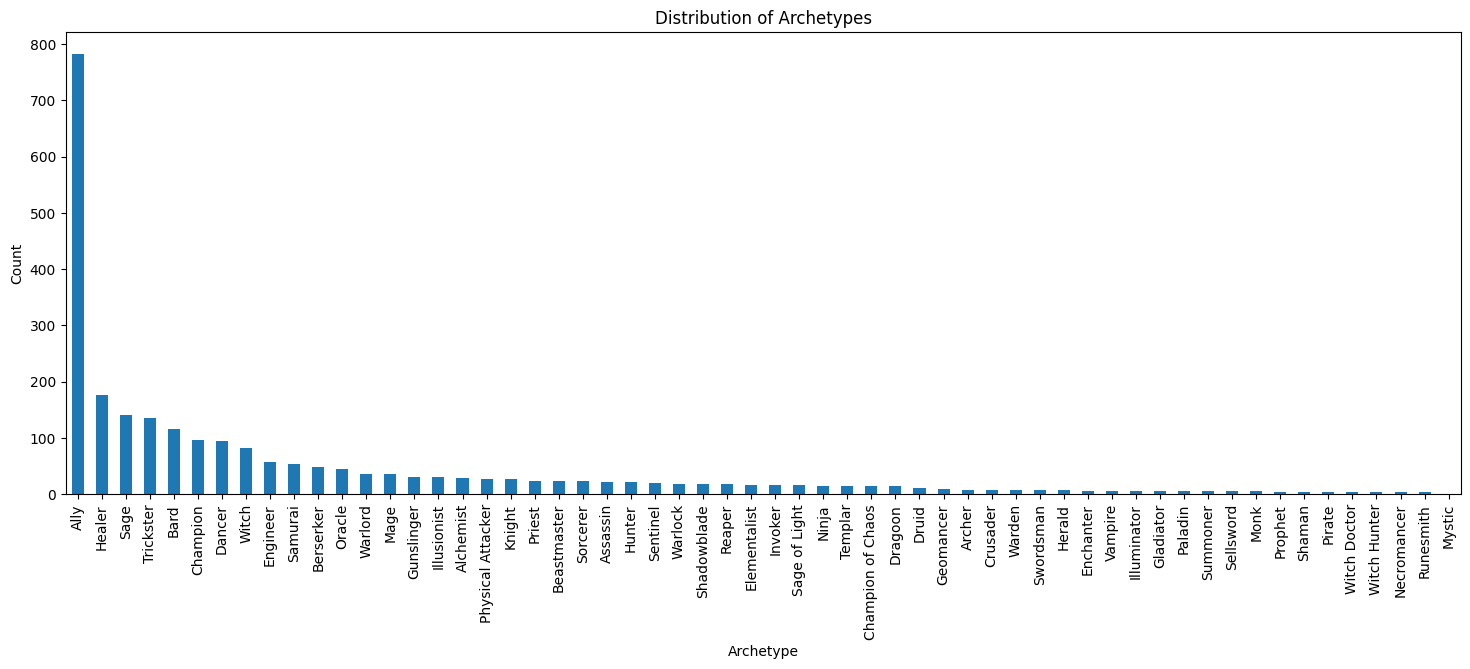

In [10]:
# Plot to see distribution of archetype
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
c["archetype"].value_counts().plot(kind="bar")
plt.title("Distribution of Archetypes")
plt.xlabel("Archetype")
plt.ylabel("Count")
plt.show()